<a href="https://colab.research.google.com/github/ShambhabiMondal/student_feedback_analysis/blob/main/Teacher_Review__SVM_Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/teacher_review_dataset_new.zip

Archive:  /content/drive/MyDrive/teacher_review_dataset_new.zip
  inflating: teacher_dataset_new.csv  
  inflating: teacher_review_dataset.csv  


In [3]:
# Importing libraries and modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# Validating user input
def get_valid_input(prompt):
    while True:
        try:
            value = int(input(prompt))
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue

        if value < 0:
            print("Sorry, your response must not be negative.")
            continue
        elif value == 0:
            print("Sorry, your response must not be zero.")
            continue
        elif value > 5:
            print("Sorry, your response must not be greater than 5.")
            continue
        else:
            break
    return value

In [5]:
# Reading the first dataset and dropping irrelevant columns
df = pd.read_csv("teacher_review_dataset.csv")
df1 = df.drop(df.columns[[0, 1, 2]], axis=1)

X = df1.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
# Reading the second dataset and dropping irrelevant columns
d = pd.read_csv("teacher_dataset_new.csv")
d1 = d.drop(d.columns[[0, 1, 12]], axis=1)

XX1 = d1[['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10']].to_numpy()
Y = d.iloc[:, -1].values

In [7]:
# Splitting the first dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Creating the SVM classifier
clf = SVC(kernel='linear', C=100)

In [9]:
# Fiiting the SVM model to the training data of the first dataset
history = clf.fit(X_train, y_train)

In [10]:
# Predicting the labels for the test set
y_pred = clf.predict(X_test)

In [11]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9888888888888889


In [12]:
# Getting the ratings for the questions from the user
l1 = []
l2 = []
print("Enter the rating scores for the faculty based on the following qustions, on a scale of 1 to 5")
print("Poor: 1 Fair: 2 Good: 3, Very Good: 4, Excellent: 5")
q1 = l1.append(get_valid_input("The faculty explained the objective of the course. Its relevance in regard to Industrial application, current development and research opportunities.   "))
q2 = l1.append(get_valid_input("The prerequisites, pertinence of the course with others and programme as a whole and the organization of the subject matter are explained.   "))
q3 = l1.append(get_valid_input("The teacher explained CO statements and its correlations with the PO's and PSO's.   "))
q4 = l1.append(get_valid_input("The teacher is enthusiastic and created interest in the subject.   "))
q5 = l1.append(get_valid_input("The teacher delivered the lecture lucidly.   "))
q6 = l1.append(get_valid_input("The teacher emphasized on numerical problem solving / mathematical formulation etc, example and data analysis.   "))
q7 = l1.append(get_valid_input("Teacher used modern and smart teaching aids, whenever relevant.   "))
q8 = l1.append(get_valid_input("Test, Assignment and quizzes were adequate.   "))
q9 = l1.append(get_valid_input("The teacher provides opportunities for participatory learning.   "))
q10 = l1.append(get_valid_input("Your level of satisfaction with the all round contribution of the teacher.   "))
l2.append(l1)

Enter the rating scores for the faculty based on the following qustions, on a scale of 1 to 5
Poor: 1 Fair: 2 Good: 3, Very Good: 4, Excellent: 5
The faculty explained the objective of the course. Its relevance in regard to Industrial application, current development and research opportunities.   3
The prerequisites, pertinence of the course with others and programme as a whole and the organization of the subject matter are explained.   2
The teacher explained CO statements and its correlations with the PO's and PSO's.   2
The teacher is enthusiastic and created interest in the subject.   4
The teacher delivered the lecture lucidly.   4
The teacher emphasized on numerical problem solving / mathematical formulation etc, example and data analysis.   4
Teacher used modern and smart teaching aids, whenever relevant.   3
Test, Assignment and quizzes were adequate.   5
The teacher provides opportunities for participatory learning.   3
Your level of satisfaction with the all round contributio

In [13]:
# Encoding categorical data input into a dataframe
dat_f = pd.DataFrame(l2, columns=['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10'])

In [14]:
# Converting the input dataframe to numpy array
X1 = dat_f.to_numpy()

In [15]:
# Predicting the label for input data
y_pred1 = clf.predict(X1)

In [16]:
# Printing the predicted label
print("The predicted label is:", y_pred1[0])

The predicted label is: 1


In [17]:
# Splitting the second dataset into training and validation sets
X1_train, X1_test, y1_train, y1_test = train_test_split(XX1, Y, test_size=0.2, random_state=42)

In [18]:
# Fitting the SVM model to the training data of the second dataset only on the first two features
clf.fit(X1_train[:,:2], y1_train)

SVC(C=100, kernel='linear')

In [19]:
# Defining the maximum and minimum values of the first two features
x_min, x_max = X1_train[:, 0]. min() - 1, X1_train[:, 0].max() + 1
y_min, y_max = X1_train[:, 0]. min() - 1, X1_train[:, 1].max() + 1

# Creating a meshgrid spanning the range of training data
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

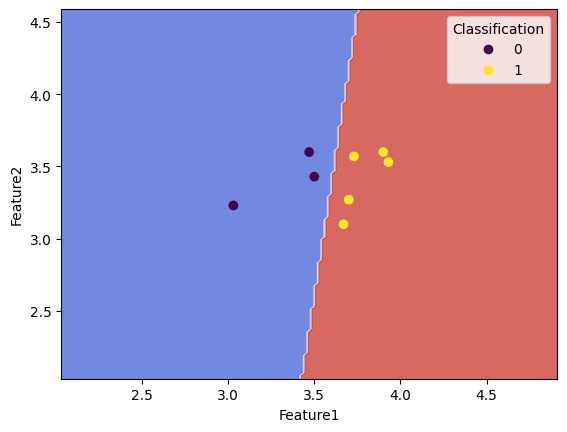

In [20]:
# Predicting the label for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundary as a contour plot
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plotting the training data as scatter points
scat=plt.scatter(X1_train[:, 0], X1_train[:, 1], c=y1_train)
legend1=plt.legend(*scat.legend_elements(),
                   loc="upper right", title="Classification")

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Displaying the plot
plt.show()

In [21]:
# Predicting the output for the second dataset for the validation set
y1_pred = clf.predict(X1_test[:, :2])

In [22]:
# Calculating the accuracy for the above prediction
accuracy1 = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy1)

Accuracy: 1.0


In [23]:
# Fitting the SVM model to the entire second dataset only on the first two features
clf.fit(XX1[:,:2], Y)

SVC(C=100, kernel='linear')

In [24]:
# Defining the maximum and minimum values of the first two features
x1_min, x1_max = XX1[:, 0]. min() - 1, XX1[:, 0].max() + 1
y1_min, y1_max = XX1[:, 0]. min() - 1, XX1[:, 1].max() + 1

# Creating a meshgrid spanning the range of training data
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

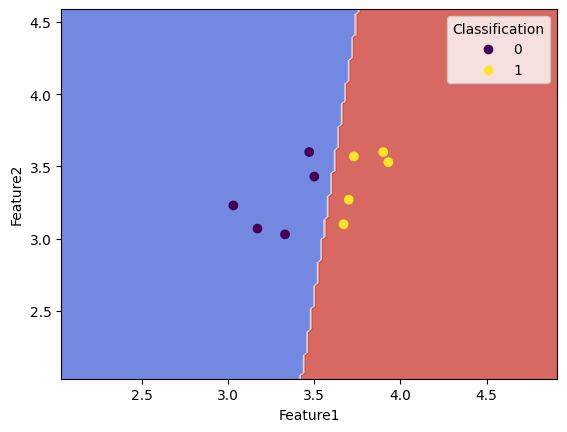

In [25]:
# Predicting the label for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundary as a contour plot
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plotting the training data as scatter points
scat=plt.scatter(XX1[:, 0], XX1[:, 1], c=Y)
legend1=plt.legend(*scat.legend_elements(),
                   loc="upper right", title="Classification")

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Displaying the plot
plt.show()